# AAI Assignment 3
Author: Zhicong Sun  
SID: 12032471  
Date: 2020.11.26

## 1. Introduction

## 2. The Data analysis and Preprocessing
### 2.1 First meeting with data

In [1]:
# import basic module
import numpy as np
import pandas as pd

In [2]:
# read data from txt file
data = pd.read_csv("traindata.txt",sep='\s',engine='python')
test_data = pd.read_csv("testdata.txt",sep='\s',engine='python')
label = pd.read_csv("trainlabel.txt",sep='\s',engine='python')

print("data.head:\n",data.head(),"\n")
print("Shape of data: ",data.shape)
print("Shape of data label:",label.shape)
print("Shape of test data: ",test_data.shape)

data.head:
    52  1  0  125  212  0.1  1.1  168  0.2  1.0  2  2.1  3
0  53  1  0  140  203    1    0  155    1  3.1  0    0  3
1  70  1  0  145  174    0    1  125    1  2.6  0    0  3
2  61  1  0  148  203    0    1  161    0  0.0  2    1  3
3  62  0  0  138  294    1    1  106    0  1.9  1    3  2
4  58  0  0  100  248    0    0  122    0  1.0  1    0  2 

Shape of data:  (699, 13)
Shape of data label: (699, 1)
Shape of test data:  (324, 13)


***
**Note:**  
1. It can be seem that the data set has 699 row and 13 column, which means there are 13 feature. Because the data set has no feature names, so we use feature i to name them in the 1.2. After adding feature name, data will have one more row.  
2. Some data had been changed from integer type to float type when they were regarded as the data title such as the data in the first row and the sixth column (0.1),the first row and the seventh column (1.1) and so on. But it doesn't matter, when we add feature names to data, this type-error data will be changed to their original type automatically
***
### 2.2 Assign feature names to data

In [3]:
# assign a feature name to each column of data set, test set and label
feature_names = []
for i in range(data.shape[1]):
    feature_names.append("feature" + str(i))
data = pd.read_csv("traindata.txt",sep='\s',engine='python',names=feature_names)
test_data = pd.read_csv("testdata.txt",sep='\s',engine='python',names=feature_names)
label = pd.read_csv("trainlabel.txt",sep='\s',engine='python',names = ["label"])

print("feature names: ",feature_names,"\n")
print("\ndata.head:\n",data.head(),"\n")
print("label.head:\n",label.head(),"\n")
print("Shape of data: ",data.shape)
print("Shape of data label:",label.shape)

feature names:  ['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12'] 


data.head:
    feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0        52         1         0       125       212         0         1   
1        53         1         0       140       203         1         0   
2        70         1         0       145       174         0         1   
3        61         1         0       148       203         0         1   
4        62         0         0       138       294         1         1   

   feature7  feature8  feature9  feature10  feature11  feature12  
0       168         0       1.0          2          2          3  
1       155         1       3.1          0          0          3  
2       125         1       2.6          0          0          3  
3       161         0       0.0          2          1          3  
4       106         0  

### 2.3 Data exploration  
#### 2.3.1 Check if the data has missing values

In [4]:
# check if the data has missing values 
print("data.info:")
data.info()
print("\ndata sum of Null values:",data.isnull().sum())

data.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   700 non-null    int64  
 1   feature1   700 non-null    int64  
 2   feature2   700 non-null    int64  
 3   feature3   700 non-null    int64  
 4   feature4   700 non-null    int64  
 5   feature5   700 non-null    int64  
 6   feature6   700 non-null    int64  
 7   feature7   700 non-null    int64  
 8   feature8   700 non-null    int64  
 9   feature9   700 non-null    float64
 10  feature10  700 non-null    int64  
 11  feature11  700 non-null    int64  
 12  feature12  700 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 71.2 KB

data sum of Null values: feature0     0
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
dtype: int6

#### 2.3.2 Label visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

1    361
0    339
Name: label, dtype: int64


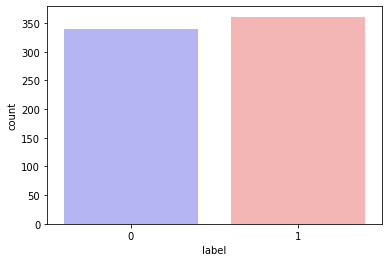

In [6]:
# label visualization
print(label.label.value_counts())
sns.countplot(x="label", data=label, palette="bwr")
plt.show()

***
**Note:**  
There are two types of labels, this is a classification problem.
***

#### 2.3.3 Correlation matrix visualization and statistics for features

In [92]:
# view statistics for all features
data.describe()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,54.290000,0.682857,0.972857,132.284286,248.274286,0.155714,0.501429,149.687143,0.332857,1.074143,1.387143,0.762857,2.302857
std,9.302893,0.465696,1.019470,18.062221,54.231440,0.362844,0.525459,23.224675,0.471573,1.200418,0.621600,1.048628,0.616644
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,282.000000,0.000000,1.000000,168.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


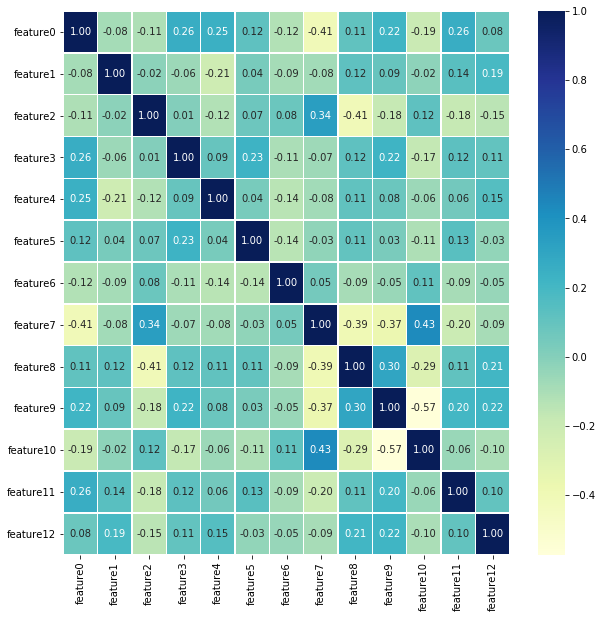

In [7]:
# correlation matrix visualization
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()

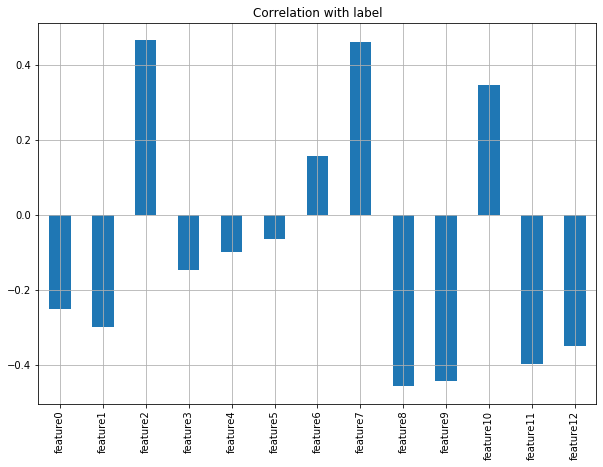

In [8]:
data.corrwith(label.label).plot(kind='bar',grid=True,figsize=(10, 7),title="Correlation with label")

***
**Note:**  
Most of the features have a strong correlation with the label, but there are also a few features that are not strongly associated with the label, such as feature 4 and feature 5. 
***
#### 2.3.4 Divide features into categorical value and continous value


In [9]:
# divide features into categorical value and continous value
categorical_val = []
continous_val = []
for column in data.columns:
    print('---------------------------')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
print("\ncategorical features:",categorical_val)
print("\ncontinous_val features:",continous_val)

---------------------------
feature0 : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
---------------------------
feature1 : [1 0]
---------------------------
feature2 : [0 1 2 3]
---------------------------
feature3 : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
---------------------------
feature4 : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 

#### 2.3.5 Continous features visualization

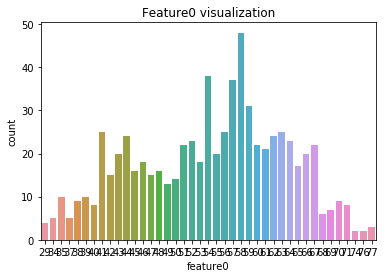

In [10]:
# feature0 visualization
sns.countplot(x='feature0', data=data)
plt.title("Feature0 visualization")
plt.show()

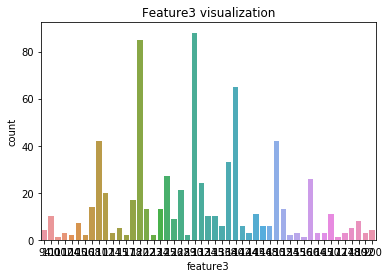

In [11]:
# feature3 visualization
sns.countplot(x='feature3', data=data)
plt.title("Feature3 visualization")
plt.show()

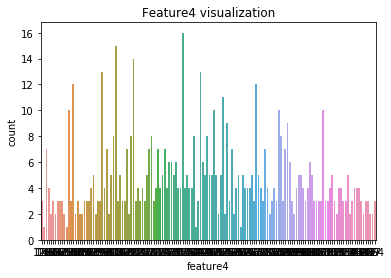

In [12]:
# feature4 visualization
sns.countplot(x='feature4', data=data)
plt.title("Feature4 visualization")
plt.show()

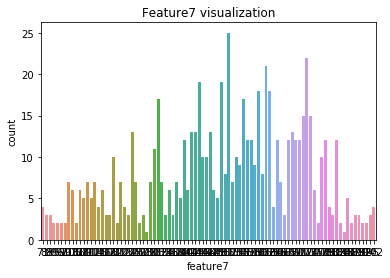

In [13]:
# feature7 visualization
sns.countplot(x='feature7', data=data)
plt.title("Feature7 visualization")
plt.show()

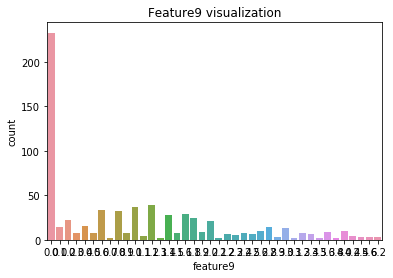

In [14]:
# feature9 visualization
sns.countplot(x='feature9', data=data)
plt.title("Feature9 visualization")
plt.show()

***
**Note:**  
1. The continuous features have almost no outliers.  
2. The feature0,feature3,feature4 and feature7 seem to obey the normal distribution.  
3. It is hard to figure out if the feature9 obey the normal distribution, but I tend to treat it as a feature following the normal distribution. Because after we supplement the data on the right side of the axis (even if the data is meaningless), it appears to follow a normal distribution.

***

#### 2.3.6 Categorical features visualization

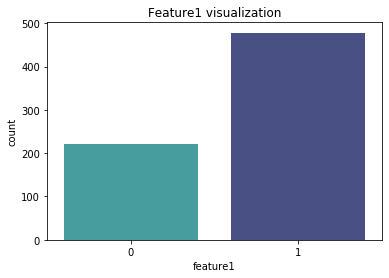

In [15]:
# feature1 visualization
sns.countplot(x='feature1', data=data, palette="mako_r")
plt.title("Feature1 visualization")
plt.show()

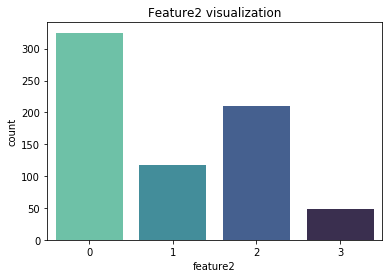

In [16]:
# feature2 visualization
sns.countplot(x='feature2', data=data, palette="mako_r")
plt.title("Feature2 visualization")
plt.show()

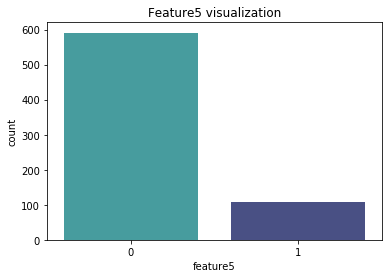

In [17]:
# feature5 visualization
sns.countplot(x='feature5', data=data, palette="mako_r")
plt.title("Feature5 visualization")
plt.show()

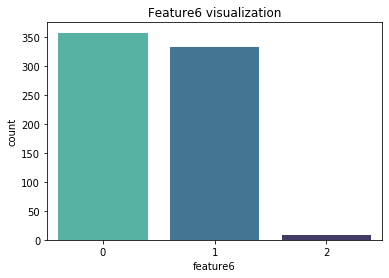

In [18]:
# feature6 visualization
sns.countplot(x='feature6', data=data, palette="mako_r")
plt.title("Feature6 visualization")
plt.show()

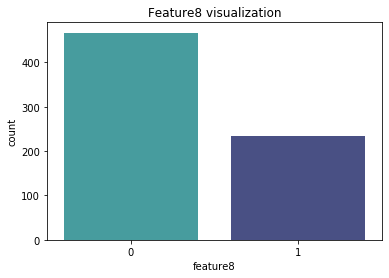

In [19]:
# feature8 visualization
sns.countplot(x='feature8', data=data, palette="mako_r")
plt.title("Feature8 visualization")
plt.show()

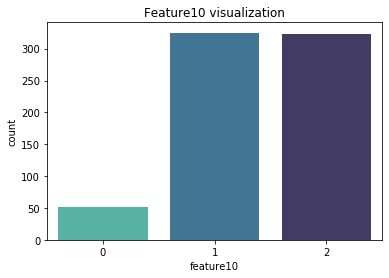

In [20]:
# feature10 visualization
sns.countplot(x='feature10', data=data, palette="mako_r")
plt.title("Feature10 visualization")
plt.show()

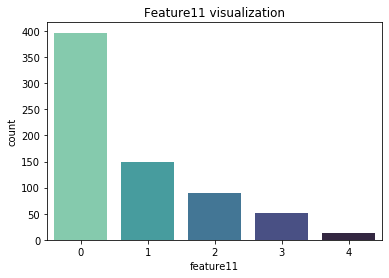

In [21]:
# feature11 visualization
sns.countplot(x='feature11', data=data, palette="mako_r")
plt.title("Feature11 visualization")
plt.show()

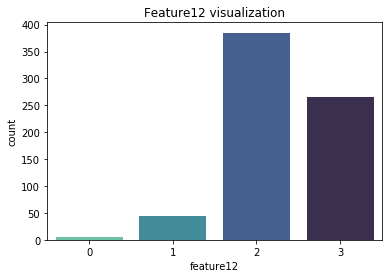

In [22]:
# feature12 visualization
sns.countplot(x='feature12', data=data, palette="mako_r")
plt.title("Feature12 visualization")
plt.show()

***
**Note:**  
Except for the feature11, other features seem to be disordered. But we can tolerate the loss of information caused by using feature11 as an unordered variable. Let's try it.
***

### 2.4 Data preprocessing  
***  
Based on the data exploration, we can get the following conclusions:  
1. There is no missing value in data set.    
2. There are two types of features: categorical and continous.  
3. The continuous features have almost no outliers and most of they seem to obey the nomal distribution.  
4. The categorical features can be regarded as disordered vaue.
***

#### 2.4.1 Dummy coding of categorical features

In [23]:
dataset = pd.get_dummies(data, columns = categorical_val)
print(data.columns)
print(dataset.columns)

Index(['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
       'feature11', 'feature12'],
      dtype='object')
Index(['feature0', 'feature3', 'feature4', 'feature7', 'feature9',
       'feature1_0', 'feature1_1', 'feature2_0', 'feature2_1', 'feature2_2',
       'feature2_3', 'feature5_0', 'feature5_1', 'feature6_0', 'feature6_1',
       'feature6_2', 'feature8_0', 'feature8_1', 'feature10_0', 'feature10_1',
       'feature10_2', 'feature11_0', 'feature11_1', 'feature11_2',
       'feature11_3', 'feature11_4', 'feature12_0', 'feature12_1',
       'feature12_2', 'feature12_3'],
      dtype='object')


#### 2.4.2 Features scaling of continous features

In [24]:
# standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_aft_stdsscsl = dataset
data_aft_stdsscsl[continous_val] = standard_scaler.fit_transform(dataset[continous_val])
data_aft_stdsscsl.head()

,feature0,feature3,feature4,feature7,feature9,feature1_0,feature1_1,feature2_0,feature2_1,feature2_2,...,feature10_2,feature11_0,feature11_1,feature11_2,feature11_3,feature11_4,feature12_0,feature12_1,feature12_2,feature12_3
0,-0.246336,-0.403577,-0.669358,0.789072,-0.061808,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.138766,0.427480,-0.835432,0.228923,1.688833,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.689930,0.704498,-1.370559,-1.063731,1.272013,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.721797,0.870710,-0.835432,0.487453,-0.895447,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0.829367,0.316672,0.843762,-1.882411,0.688466,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


## 3. The Model selction
### 3.1 K Nearest Neighbor(KNN)

In [37]:
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_validate


In [86]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
# scores = cross_val_score(clf_knn,data_aft_stdsscsl,label,cv=cv)
scores = cross_validate(clf_knn,data_aft_stdsscsl,label,cv=cv,return_train_score=True)
print("Train accuracy of KNN: {:.2f}%".format(scores['train_score'].mean()*100))
print("Test accuracy of KNN: {:.2f}%".format(scores['test_score'].mean()*100))
compare_models = pd.DataFrame(data=[["KNN", scores['train_score'].mean()*100, scores['test_score'].mean()*100]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
compare_models

Train accuracy of KNN: 91.29%
Test accuracy of KNN: 86.14%


,Model,Training Accuracy %,Testing Accuracy %
0,KNN,91.285714,86.142857


### 3.2 Support Vector Machine (SVM)

In [89]:
from sklearn.svm import SVC
clf_svm = SVC(random_state = 1)
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
# scores = cross_val_score(clf_svm,data_aft_stdsscsl,label,cv=cv)
# print("Test accuracy of SVC: {:.2f}%".format(scores.mean()*100))
scores = cross_validate(clf_svm,data_aft_stdsscsl,label,cv=cv,return_train_score=True)
print("Train accuracy of SVM: {:.2f}%".format(scores['train_score'].mean()*100))
print("Test accuracy of SVM: {:.2f}%".format(scores['test_score'].mean()*100))
compare_model_1 = pd.DataFrame(data=[["SVM", scores['train_score'].mean()*100, scores['test_score'].mean()*100]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
compare_models = compare_models.append(compare_model_1,ignore_index=True)
compare_models

Train accuracy of SVM: 94.40%
Test accuracy of SVM: 90.18%


,Model,Training Accuracy %,Testing Accuracy %
0,KNN,91.285714,86.142857
1,SVM,94.404762,90.178571


### 3.3 Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier()
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
# scores = cross_val_score(clf_dtc,data_aft_stdsscsl,label,cv=cv)
# print("Test accuracy of Decision tree: {:.2f}%".format(scores.mean()*100))
scores = cross_validate(clf_dtc,data_aft_stdsscsl,label,cv=cv,return_train_score=True)
print("Train accuracy of Decision Tree: {:.2f}%".format(scores['train_score'].mean()*100))
print("Test accuracy of Decision Tree: {:.2f}%".format(scores['test_score'].mean()*100))
compare_model_2 = pd.DataFrame(data=[["Decision Tree", scores['train_score'].mean()*100, scores['test_score'].mean()*100]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
compare_models = compare_models.append(compare_model_2,ignore_index=True)
compare_models

Train accuracy of Decision Tree: 100.00%
Test accuracy of Decision Tree: 91.71%


,Model,Training Accuracy %,Testing Accuracy %
0,KNN,91.285714,86.142857
1,SVM,94.404762,90.178571
2,Decision Tree,100.000000,91.714286


### 3.4 Neural Netwrok

In [93]:
from sklearn.neural_network import MLPClassifier
clf_neural_net = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
# scores = cross_val_score(clf_dtc,data_aft_stdsscsl,label,cv=cv)
# print("Test accuracy of Decision tree: {:.2f}%".format(scores.mean()*100))
scores = cross_validate(clf_neural_net,data_aft_stdsscsl,label,cv=cv,return_train_score=True)
print("Train accuracy of Decision Tree: {:.2f}%".format(scores['train_score'].mean()*100))
print("Test accuracy of Decision Tree: {:.2f}%".format(scores['test_score'].mean()*100))
compare_model_3 = pd.DataFrame(data=[["Neural Network", scores['train_score'].mean()*100, scores['test_score'].mean()*100]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
compare_models = compare_models.append(compare_model_3,ignore_index=True)
compare_models

Train accuracy of Decision Tree: 97.33%
Test accuracy of Decision Tree: 91.39%


,Model,Training Accuracy %,Testing Accuracy %
0,KNN,91.285714,86.142857
1,SVM,94.404762,90.178571
2,Decision Tree,100.000000,91.714286
3,Neural Network,97.333333,91.392857


### 3.5 Ensembel Model 

In [94]:
from sklearn.ensemble import VotingClassifier
clf_ensembel = VotingClassifier(estimators=[('knn',clf_knn), ('svm',clf_svm), ('decision tree',clf_dtc),('neural network',clf_neural_net)],voting='hard')
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
# scores = cross_val_score(clf_dtc,data_aft_stdsscsl,label,cv=cv)
# print("Test accuracy of Decision tree: {:.2f}%".format(scores.mean()*100))
scores = cross_validate(clf_ensembel,data_aft_stdsscsl,label,cv=cv,return_train_score=True)
print("Train accuracy of Decision Tree: {:.2f}%".format(scores['train_score'].mean()*100))
print("Test accuracy of Decision Tree: {:.2f}%".format(scores['test_score'].mean()*100))
compare_model_4 = pd.DataFrame(data=[["Ensembel Model", scores['train_score'].mean()*100, scores['test_score'].mean()*100]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
compare_models = compare_models.append(compare_model_4,ignore_index=True)
compare_models

Train accuracy of Decision Tree: 97.67%
Test accuracy of Decision Tree: 92.32%


,Model,Training Accuracy %,Testing Accuracy %
0,KNN,91.285714,86.142857
1,SVM,94.404762,90.178571
2,Decision Tree,100.000000,91.714286
3,Neural Network,97.333333,91.392857
4,Ensembel Model,97.666667,92.321429


### Other code

In [ ]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_score_list = []
plt.figure(figsize=(5,5))
for i in range(1,20):    
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    clf_knn.fit(train_data,train_label)
    knn_score = clf_knn.score(validation_data,validation_label)
    knn_score_list.append(knn_score)
    
    validation_proba = clf_knn.predict_proba(validation_data)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(validation_label,validation_proba[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plot_roc_(false_positive_rate,true_positive_rate,roc_auc)
# plt.show()
plt.plot(range(1,20), knn_score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
acc = max(knn_score_list)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

# predict the label of test data
# predict_label = clf_knn.predict(test_data)
# print(predict_label)

In [ ]:
# # divide the data set into two sets of training set and validation set
# from sklearn.model_selection import train_test_split
# train_data,validation_data,train_label,validation_label = train_test_split(dataset,label,test_size = 0.4,random_state=0)

# print("Shape of train data",train_data.shape)
# print("Shape of validation data",validation_data.shape)
# print("Shape of train label",train_label.shape)
# print("Shape of validation label",validation_label.shape)